In [1]:
import matplotlib
import matplotlib.pyplot as plt

import math
import gym
import numpy as np
import copy
import pandas as pd
import seaborn as sns
import time

import imageio

import IPython
from IPython.display import Image

import sys, subprocess
import time

import itertools


from State import State
from Movement_evaluation import evaluate_by_gravity
import numpy as np
import random
import time
from Ball import Ball
from Config import *
from Game import Game


## Load Data

In [2]:
names = ["LZM_1", "LZM_2", "ZKH1", "ZKH2", "PHL", "FYJ"]

In [3]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
N_features = game.current_state.vectorize().shape[0]
N_sample = 5000

In [4]:
X_train = np.zeros( (N_sample, N_features ) )
Y_train = np.zeros( N_sample )
current_row = 0

In [5]:
for name in names:
    X_np = np.loadtxt("data/X_train_" + name + ".csv", delimiter=",")
    Y_np = np.loadtxt("data/Y_train_" + name + ".csv", delimiter=",")
    for x, y in zip(X_np, Y_np):
        X_train[current_row, :] = x
        Y_train[current_row] = y
        current_row += 1

In [6]:
X = X_train[:current_row]
Y = Y_train[:current_row]
Y = Y / screen_x

In [8]:
Y= np.clip(Y, 0, 1)

Text(0.5, 0, 'percentage')

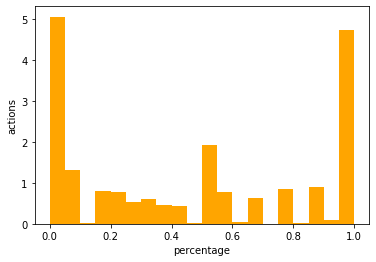

In [33]:
plt.hist(Y, density=True, color='orange', bins=20)
plt.ylabel('actions')
plt.xlabel('percentage')

# Imitate Learning

## linear regression

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [397]:
rgr_lr = LinearRegression().fit(X_train, y_train)
y_predict = rgr_lr.predict(X_test)

In [398]:
mean_squared_error(y_predict, y_test)

0.1529211478507719

## Neural Network

In [399]:
import tensorflow as tf

In [416]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation = "relu"))
    model.compile(optimizer='adam',
              loss="mae",
              metrics=['mae'])
#     model.summary()
    return model

In [417]:
epochs = 200
batch_size = 32

In [418]:
model = build_model()
model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_split=0.20, shuffle=True)

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 0.3781 - mae: 0.3781 - val_loss: 0.3786 - val_mae: 0.3786
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3529 - mae: 0.3529 - val_loss: 0.3701 - val_mae: 0.3701
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3343 - mae: 0.3343 - val_loss: 0.3574 - val_mae: 0.3574
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3253 - mae: 0.3253 - val_loss: 0.3409 - val_mae: 0.3409
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3134 - mae: 0.3134 - val_loss: 0.3462 - val_mae: 0.3462
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3249 - mae: 0.3249 - val_loss: 0.3542 - val_mae: 0.3542
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3005 - mae: 0.3005 - val_loss: 0.3447 - val_mae: 0.3447
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2956 - m

Epoch 125/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1223 - mae: 0.1223 - val_loss: 0.3128 - val_mae: 0.3128
Epoch 126/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1201 - mae: 0.1201 - val_loss: 0.3201 - val_mae: 0.3201
Epoch 127/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1074 - mae: 0.1074 - val_loss: 0.3146 - val_mae: 0.3146
Epoch 128/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1117 - mae: 0.1117 - val_loss: 0.3153 - val_mae: 0.3153
Epoch 129/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1203 - mae: 0.1203 - val_loss: 0.3200 - val_mae: 0.3200
Epoch 130/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1169 - mae: 0.1169 - val_loss: 0.3144 - val_mae: 0.3144
Epoch 131/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1138 - mae: 0.1138 - val_loss: 0.3177 - val_mae: 0.3177
Epoch 132/200
34/34 [==============================] - 0s 5ms/step - 

In [419]:
mean_squared_error(model.predict(X_test), y_test)

0.19821265675507713

In [408]:
model.predict(X_test)

array([[0.56801474],
       [0.5594598 ],
       [0.3381542 ],
       [0.16388816],
       [0.883243  ],
       [0.27887172],
       [0.5445646 ],
       [0.02175206],
       [0.7133662 ],
       [0.04391927],
       [0.5731407 ],
       [0.3561979 ],
       [0.3505982 ],
       [0.9558308 ],
       [0.87399995],
       [0.3133912 ],
       [0.27787715],
       [0.36913446],
       [0.10011596],
       [0.03451426],
       [0.7107775 ],
       [0.0501123 ],
       [0.8971641 ],
       [0.66808754],
       [0.85920626],
       [0.8274144 ],
       [0.77874887],
       [0.03702336],
       [0.5067528 ],
       [0.3379709 ],
       [0.5141749 ],
       [0.77226233],
       [0.02730657],
       [0.3001306 ],
       [0.02078642],
       [0.599143  ],
       [0.14171068],
       [1.0294576 ],
       [0.420514  ],
       [0.07798386],
       [0.58948255],
       [0.13868776],
       [0.17464715],
       [0.11592299],
       [0.03293159],
       [0.30311504],
       [0.69611365],
       [0.720

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [23]:
for d in range(40, 44):
    rgr_rfc = RandomForestRegressor(max_depth=d, 
                                    random_state=42, 
                                    max_features='auto', 
                                    criterion='mae',
                                    warm_start=True,
                                    n_estimators=200)
    rgr_rfc.fit(X_train, y_train)
    print( mean_squared_error( rgr_rfc.predict(X_test), y_test) )

0.12817375392746724
0.12780450082647615
0.12764293805262492
0.1280689212196631


## kNN

In [15]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

In [16]:
rgr_kNN = KNeighborsRegressor(n_neighbors=2)

In [17]:
rgr_kNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [19]:
np.mean((np.abs(rgr_kNN.predict(X_test) - y_test))**2 )

0.18227112188655142

In [20]:
rgr_kNN.predict([X[1]])

array([0.54960317])

In [21]:
X[1]

array([0.31349206, 0.        , 0.        , 0.        , 0.12698413,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Test the Model

In [24]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)

In [25]:
clf_rfc.predict( np.array([game.current_state.vectorize()]) )[0]

NameError: name 'clf_rfc' is not defined

In [26]:
def play_one_episode(game, agent, max_step = None, plot = False):
    is_finish = False
    current_state = game.init_state()
    reward_recorder = []
    step = 1

    while not is_finish:
        action = agent.get_action(current_state)
#         print(action)
        next_state, reward, is_finish = game.next_step(action, verbose = False)
        if plot:
            next_state.plot_state()
        reward_recorder.append(reward)
        current_state = next_state
        step += 1
        if max_step and step >= max_step:
            break
    
    return reward_recorder[-1], reward_recorder, game.current_reward

In [27]:
class Imitate_Agent(object):
    
    def __init__(self, model, game):
        self.model = model
        self.game = game
        
    def get_action(self, state):
        return int( self.game.screen_x * (1* self.model.predict( np.array([state.vectorize()]) )[0]))

In [28]:
nn_policy =Imitate_Agent(rgr_rfc, game)

final_rewards = [] # sum of the score at each step
scores = []

start_time = time.time()
for i in range(30):
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    R, _, score = play_one_episode(game, nn_policy, max_step=100)
    print(i, "\t th episode: ", R)
    final_rewards.append(R)
    scores.append(score)
end_time = time.time()

print( (end_time - start_time)/ 60 )

0 	 th episode:  201
1 	 th episode:  238
2 	 th episode:  182
3 	 th episode:  304
4 	 th episode:  142
5 	 th episode:  190
6 	 th episode:  200
7 	 th episode:  218
8 	 th episode:  236
9 	 th episode:  191
10 	 th episode:  162
11 	 th episode:  275
12 	 th episode:  239
13 	 th episode:  236
14 	 th episode:  181
15 	 th episode:  224
16 	 th episode:  235
17 	 th episode:  303
18 	 th episode:  191
19 	 th episode:  270
20 	 th episode:  212
21 	 th episode:  266
22 	 th episode:  246
23 	 th episode:  190
24 	 th episode:  220
25 	 th episode:  223
26 	 th episode:  254
27 	 th episode:  149
28 	 th episode:  134
29 	 th episode:  188
14.159441725413005


In [29]:
np.mean(scores)

216.66666666666666

In [30]:
np.std(scores)

42.70701217468729

Text(0.5, 0, 'Points')

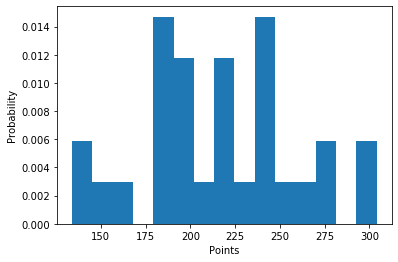

In [31]:
plt.hist(scores, density=True, bins=15)
plt.ylabel('Probability')
plt.xlabel('Points')